# Principal Component Analysis (PCA)

This note introduces the **Principal Component Analysis (PCA)** technique using `scikit-learn`, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and intuitive to build.

## What is PCA?

Principal Component Analysis is like finding the **best view** of your data.

It rotates and reorients the data to uncover the **most important directions** — the ones that capture the most variation — and lets you **reduce dimensions** while keeping as much information as possible.

PCA is widely used to:

- Compress data by reducing the number of features  
- Visualize high-dimensional data in 2D or 3D  
- Remove noise and redundancy before applying other machine learning algorithms  

This notebook will:

- Use `scikit-learn` to demonstrate how PCA transforms and reduces data  
- Explain the math and intuition behind the process  
- Show how to implement PCA step by step from scratch using NumPy  

Let’s dive in to understand how PCA works and why it’s so useful.

## 📦 Preparation

- Load the Wine dataset using `sklearn.datasets.load_wine`
- Standardize the features for fair comparison
- Visualize the raw data using a scatterplot matrix

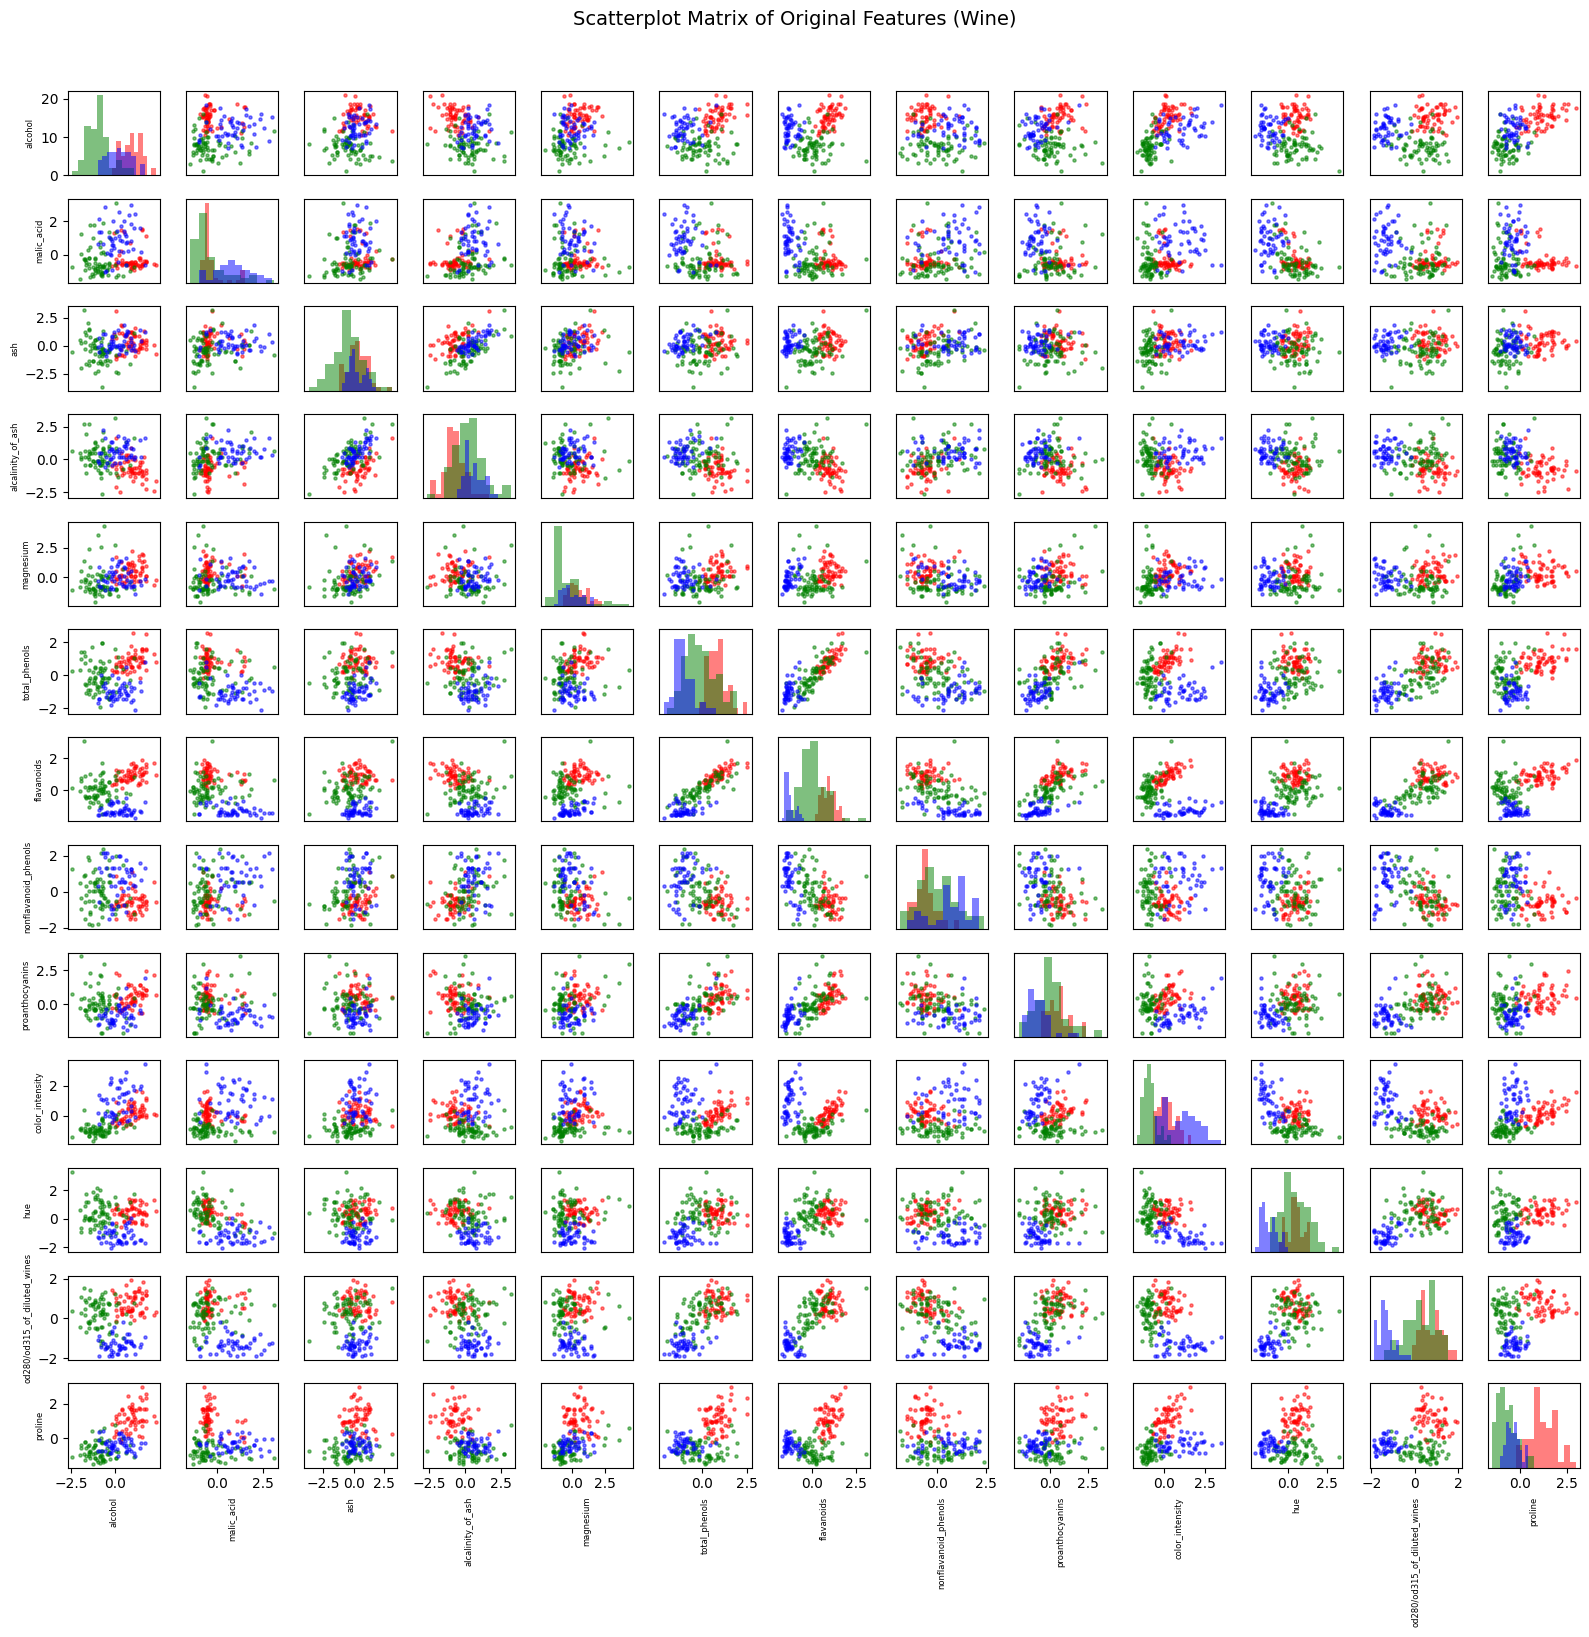

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and standardize the wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

X_std = StandardScaler().fit_transform(X)

# Raw feature scatterplot matrix
fig, axes = plt.subplots(13, 13, figsize=(16, 16))
colors = ['red', 'green', 'blue']

for i in range(13):
    for j in range(13):
        ax = axes[i, j]
        if i == j:
            for t in np.unique(y):
                ax.hist(X_std[y == t, j], bins=10, alpha=0.5, color=colors[t])
        else:
            for t in np.unique(y):
                ax.scatter(X_std[y == t, j], X_std[y == t, i], s=5, alpha=0.5, color=colors[t])
        if i == 12:
            ax.set_xlabel(feature_names[j], fontsize=6, rotation=90)
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(feature_names[i], fontsize=6)
        else:
            ax.set_yticks([])

plt.suptitle("Scatterplot Matrix of Original Features (Wine)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

## 👀 Data Observation

- The dataset contains **13 features**, which makes it hard to interpret visually
- Many features are **correlated or redundant**, as seen in the scatterplot matrix and correlation analysis
- This motivates the use of **dimensionality reduction** techniques like PCA

## ⚙️ PCA with scikit-learn

- Applied PCA using `sklearn.decomposition.PCA` on the standardized data
- The first two **principal components (PC1 and PC2)** capture most of the variation in the data
- PCA successfully **compresses** the original 13 features into fewer uncorrelated components, while preserving structure
- The **PCA scatterplot matrix** shows that **PC1 and PC2** reveal clear **class separation**, similar to the raw space but in a **simpler, decorrelated** form

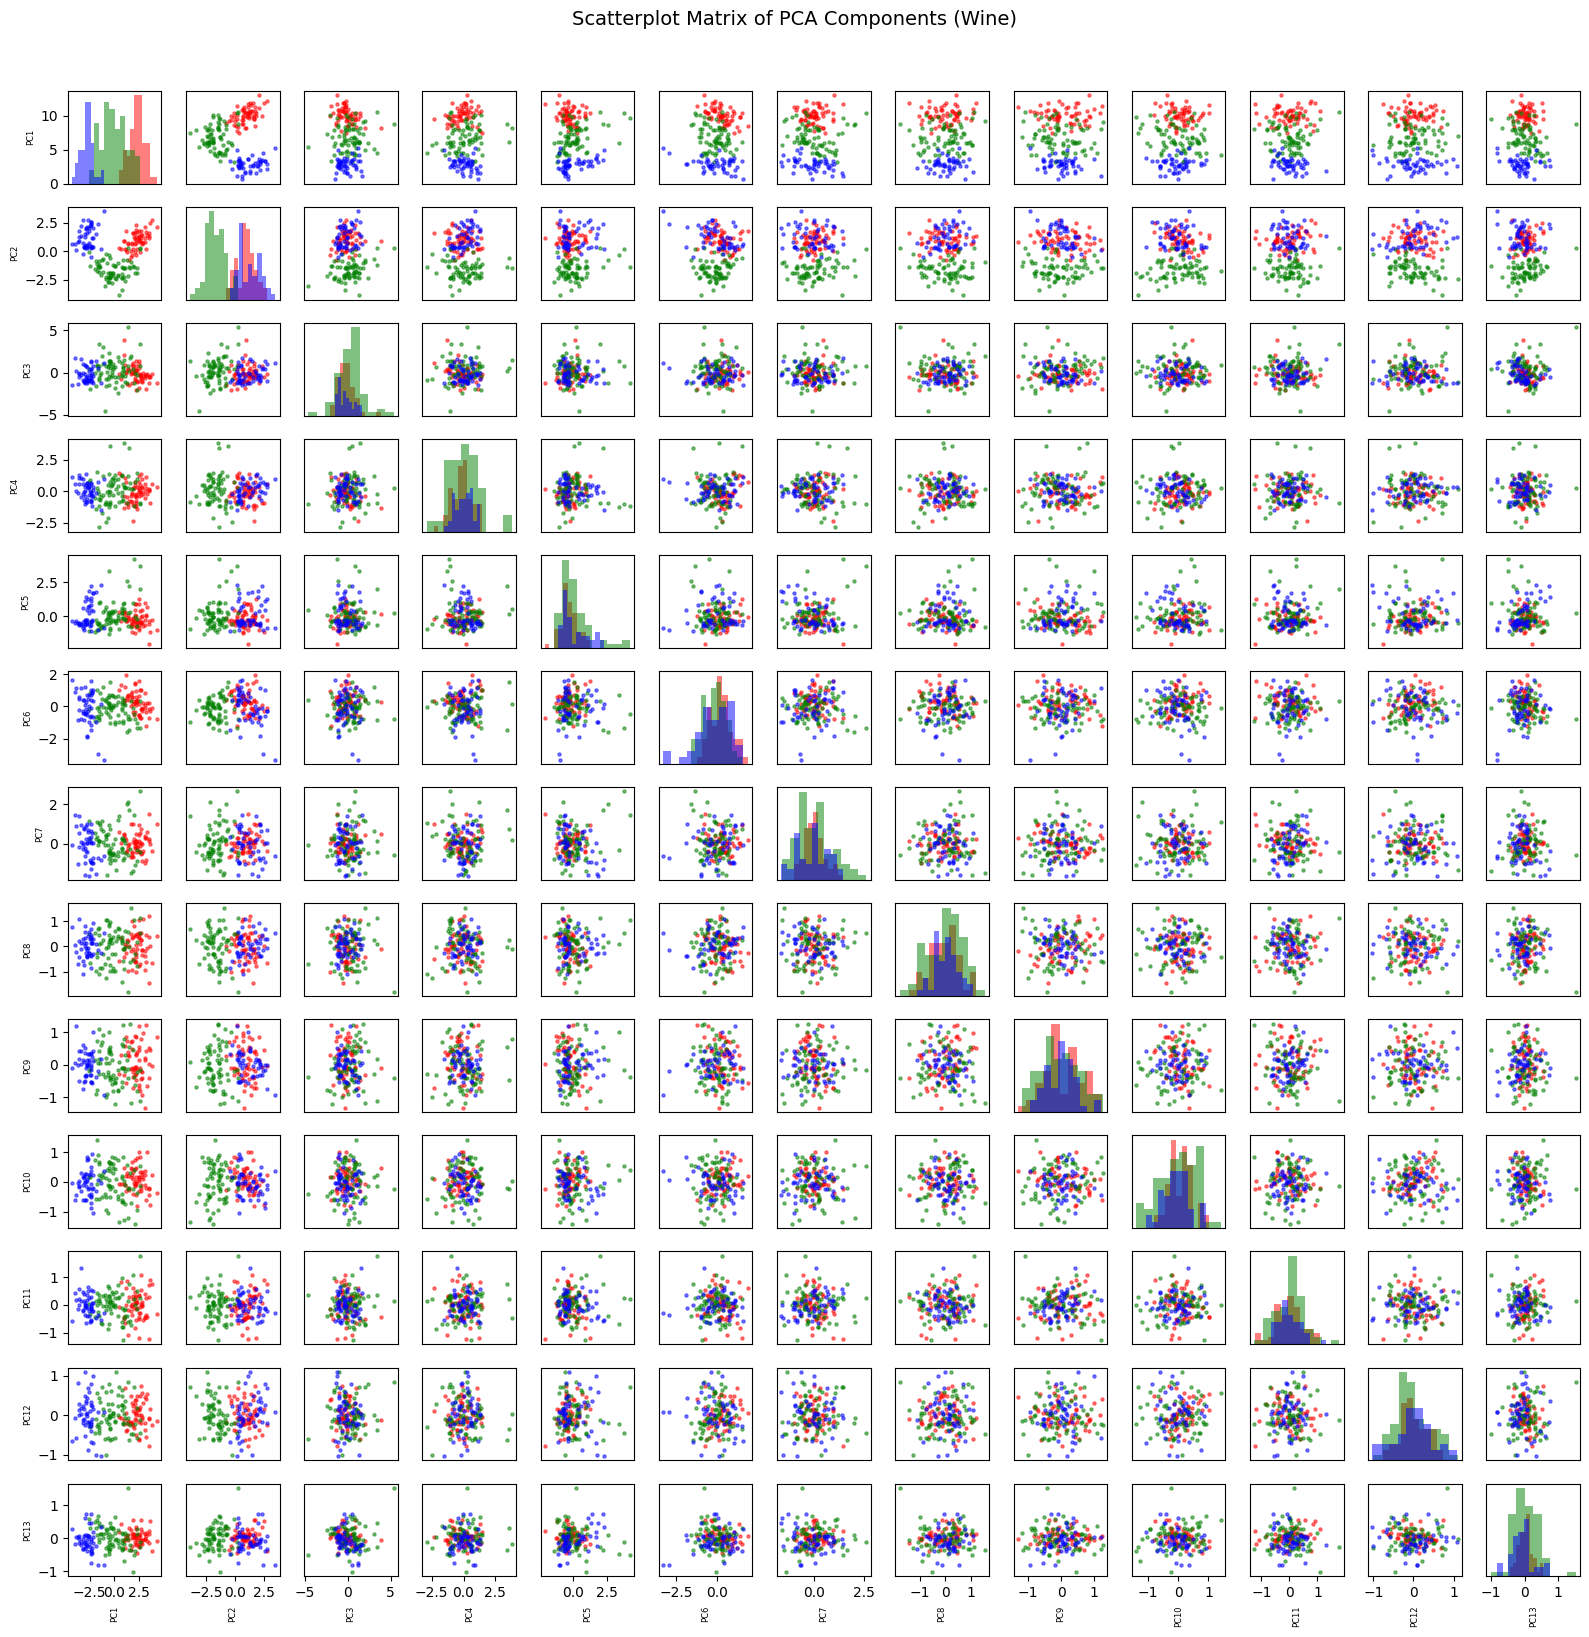

In [ ]:
# Apply PCA keeping all components
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_std)

# PCA component scatterplot matrix
fig, axes = plt.subplots(13, 13, figsize=(16, 16))

for i in range(13):
    for j in range(13):
        ax = axes[i, j]
        if i == j:
            for t in np.unique(y):
                ax.hist(X_pca[y == t, j], bins=10, alpha=0.5, color=colors[t])
        else:
            for t in np.unique(y):
                ax.scatter(X_pca[y == t, j], X_pca[y == t, i], s=5, alpha=0.5, color=colors[t])
        if i == 12:
            ax.set_xlabel(f"PC{j+1}", fontsize=6, rotation=90)
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(f"PC{i+1}", fontsize=6)
        else:
            ax.set_yticks([])

plt.suptitle("Scatterplot Matrix of PCA Components (Wine)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

## 🧠 Behind the Scenes: How PCA Works (Step-by-Step Math)

This section explains how PCA works under the hood, using clear, beginner-friendly math and simple reasoning.

### 1. 🎯 What Is the Goal of PCA?

PCA finds new **axes** (directions) in your dataset such that:
- The **first axis (PC1)** captures the most variation in the data
- The **second axis (PC2)** captures the next most variation, and so on
- These axes are **uncorrelated** and **orthogonal** (at 90° angles)
- We can reduce the number of dimensions while keeping most of the original information

### 2. 🔢 Centering the Data

We begin by **centering** the dataset — subtracting the mean of each feature (column):

$$
X_{\text{centered}} = X - \bar{X}
$$

> PCA assumes the data is centered around the origin. If we don’t subtract the mean, the direction of maximum variance may be biased.

### 3. 🧮 Covariance Matrix

To measure how features relate to each other, we compute the **covariance matrix**:

$$
\text{Cov}(X) = \frac{1}{n - 1} X_{\text{centered}}^T X_{\text{centered}}
$$

Let’s break this down:
- $X$ is your centered data (shape: $n \times d$, where $n$ = number of samples, $d$ = number of features)
- $X^T$ is the **transpose** of $X$: it flips rows into columns  
- $X^T X$ becomes a **square matrix** of size $d \times d$, showing how each feature relates to others
  - Diagonal = variance of each feature
  - Off-diagonal = how two features change together

> 💡 The covariance matrix is symmetric and contains all the pairwise relationships between features.

### 4. 🔍 Finding the Principal Axes: Eigenvectors & Eigenvalues

Now comes the key step: we compute the **eigenvectors and eigenvalues** of the covariance matrix.

#### What are they?

- An **eigenvector** is a direction that remains unchanged (except for scale) when a transformation is applied.
- An **eigenvalue** tells how much the data is **stretched** along that direction.

We solve the following equation:

$$
A \cdot v = \lambda \cdot v
$$

Where:
- $A$ is the covariance matrix
- $v$ is the eigenvector
- $\lambda$ is the eigenvalue

This is called an **eigen decomposition**.

#### How to compute eigenvalues and eigenvectors

Step 1: Rearranged equation:

$$
(A - \lambda I) \cdot v = 0
$$

Step 2: To find valid $\lambda$ values, solve this **characteristic equation**:

$$
\det(A - \lambda I) = 0
$$

This gives a polynomial in $\lambda$, and solving it gives all the **eigenvalues**.

Step 3: For each eigenvalue $\lambda$, plug it back into:

$$
(A - \lambda I) \cdot v = 0
$$

Solving this gives the corresponding **eigenvector** $v$.

> ✅ In practice, libraries like NumPy use efficient numerical algorithms to do this for large matrices.

### 5. 📊 Sorting the Components

Once we have all eigenvectors and eigenvalues:
- We **sort** the eigenvectors based on their eigenvalues, from largest to smallest.
- Each eigenvalue tells us how much variance is captured by its corresponding eigenvector.
- We can **keep all components**, or choose the **top $k$** components based on how much variance we want to retain.

> You might hear the term **explained variance ratio** — it’s just the proportion of variance captured by each component:

$$
\text{Explained Variance Ratio}_k = \frac{\lambda_k}{\sum \lambda_i}
$$

This helps us choose how many components are worth keeping.

### 6. 🔄 Projecting the Data

Now that we’ve chosen the top $k$ eigenvectors, we project the data onto these directions:

$$
X_{\text{projected}} = X_{\text{centered}} \cdot W
$$

Where:
- $W$ is a matrix whose **columns are the top $k$ eigenvectors**
  - If we keep 2 components, $W$ has shape $d \times 2$
- $X_{\text{projected}}$ is your data in the new $k$-dimensional space

> 💡 This is where **dimensionality reduction** happens — the data is now compressed while keeping most of its structure.

Next, let’s implement PCA **from scratch in NumPy** and compare it with `sklearn.PCA`.

Explained Variance Ratio (first 5): [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
Cumulative Variance (first 5): [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293]


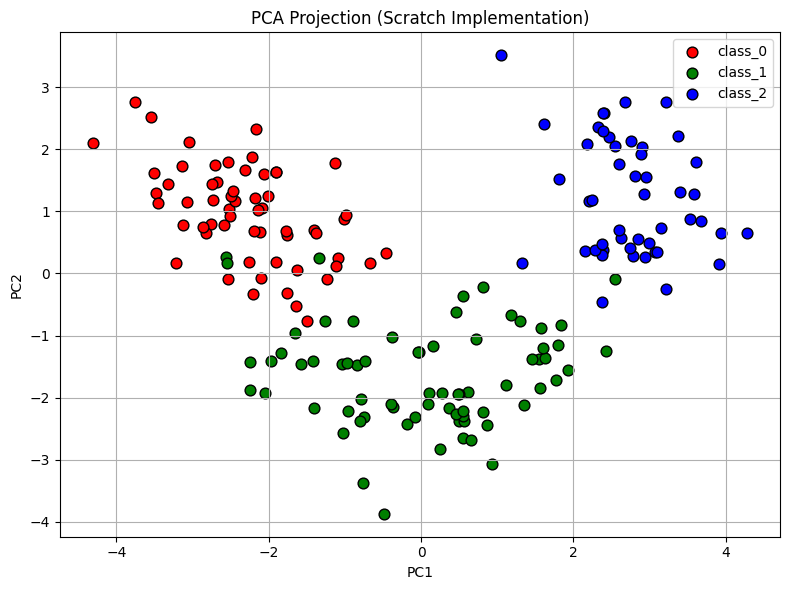

In [ ]:
# 1. Center the data
X_centered = X_std - np.mean(X_std, axis=0)  # shape: (n_samples, n_features)

# 2. Compute the covariance matrix
n_samples = X_centered.shape[0]
cov_matrix = (1 / (n_samples - 1)) * X_centered.T @ X_centered  # shape: (d, d)

# 3. Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 4. Sort eigenvectors by descending eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# 5. Compute explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# 6. Show explained variance information
print("Explained Variance Ratio (first 5):", explained_variance_ratio[:5])
print("Cumulative Variance (first 5):", cumulative_variance[:5])

# 7. Choose top k components
k = 2
W = eigenvectors[:, :k]  # shape: (d, k)

# 8. Project the data
X_pca = X_centered @ W  # shape: (n_samples, k)

# 9. Visualize the projection
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for t, color in zip(np.unique(y), colors):
    plt.scatter(X_pca[y == t, 0], X_pca[y == t, 1], label=data.target_names[t], color=color, edgecolor='k', s=60)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (Scratch Implementation)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## It Works!!

Our scratch implementation of PCA successfully extracts the principal components from the standardized Wine dataset.

- The **top 5 principal components** explain **over 80% of the total variance**, confirming that most of the dataset's structure is captured in just a few directions.
- The **PC1 vs PC2 scatter plot** (shown above) reveals clear clustering of the three classes — closely matching the top-left corner of the PCA scatterplot matrix generated using `sklearn`.

This confirms that:
- The **covariance computation**, **eigen decomposition**, and **projection** steps behave exactly as expected.
- Our scratch PCA accurately replicates the key behavior of `sklearn.PCA`.

We've successfully built a **PCA implementation from the ground up**!